# Employee Attrition Data Clean

This notebook is dedicated to cleaning and merging the 5 .csv files containing over 52 features on the 4,400 employees.  The result is one master dataFrame, which I exported as a .csv file to use in other notebooks.

## The Process<span id="0"></span>


* #### Import & Cleaning
    *   [**Import:**](#1)  Imported the .CSV files as a Pandas DataFrame.
    *   [**Merged Data:**](#2)  Where necessary, I conducted some basic feature engineering, and merged the dataframes together into a master df.
    *   [***Data Types:***](#3)  Checked for data types and removed any unnecessary features that contained string data.
    *   [***Null Values:***](#4)  Identified Null values and either removed them or transformed them into an appropriate value.
    *   [***Categorical Data:***](#5)  Identified categorical data and either dropped it or transformed it into numerical dummy variables.
    *   [***Outliers:***](#6)  Removed the top and bottom 2.5% of the dataset (the extreme outliers), which created unnecessary variance.  



In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns
sns.set(style="white")
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

***Remove***: EmployeeCount & Over18.  These columns contain the same value for every employee and therefore aren't relevant to this analysis.

***Binary***: Attrition & Gender.  Need to make these columns numerical to conduct calculations.

   *  Attrition: 0 = No, 1 = Yes
   *  Gender: 0 = Female, 1 = Male

***Categorical Data***:  BusinessTravel, Department, EducationField, JobRole, MaritalStatus,

In [2]:
general = pd.read_csv('general_data.csv')

In [3]:
pd.set_option('display.max_columns', None)
general.head()

Age Attrition     BusinessTravel              Department  DistanceFromHome  \
0   51        No      Travel_Rarely                   Sales                 6   
1   31       Yes  Travel_Frequently  Research & Development                10   
2   32        No  Travel_Frequently  Research & Development                17   
3   38        No         Non-Travel  Research & Development                 2   
4   32        No      Travel_Rarely  Research & Development                10   

   Education EducationField  EmployeeCount  EmployeeID  Gender  JobLevel  \
0          2  Life Sciences              1           1  Female         1   
1          1  Life Sciences              1           2  Female         1   
2          4          Other              1           3    Male         4   
3          5  Life Sciences              1           4    Male         3   
4          1        Medical              1           5    Male         1   

                     JobRole MaritalStatus  MonthlyIncome  NumCompaniesWorked  \
0  Healthcare Representative       Married         131160                 1.0   
1         Research Scientist        Single          41890                 0.0   
2            Sales Executive       Married         193280                 1.0   
3            Human Resources       Married          83210                 3.0   
4            Sales Executive        Single          23420                 4.0   

  Over18  PercentSalaryHike  StandardHours  StockOptionLevel  \
0      Y                 11              8                 0   
1      Y                 23              8                 1   
2      Y                 15              8                 3   
3      Y                 11              8                 3   
4      Y                 12              8                 2   

   TotalWorkingYears  TrainingTimesLastYear  YearsAtCompany  \
0                1.0                      6               1   
1                6.0                      3               5   
2                5.0                      2               5   
3               13.0                      5               8   
4                9.0                      2               6   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     0  
1                        1                     4  
2                        0                     3  
3                        7                     5  
4                        0                     4

In [5]:
general.drop(['EmployeeCount', 'Over18'], axis=1, inplace=True)

In [6]:
general.groupby(['MaritalStatus']).count()

Age  Attrition  BusinessTravel  Department  DistanceFromHome  \
MaritalStatus                                                                  
Divorced        981        981             981         981               981   
Married        2019       2019            2019        2019              2019   
Single         1410       1410            1410        1410              1410   

               Education  EducationField  EmployeeID  Gender  JobLevel  \
MaritalStatus                                                            
Divorced             981             981         981     981       981   
Married             2019            2019        2019    2019      2019   
Single              1410            1410        1410    1410      1410   

               JobRole  MonthlyIncome  NumCompaniesWorked  PercentSalaryHike  \
MaritalStatus                                                                  
Divorced           981            981                 973                981   
Married           2019           2019                2012               2019   
Single            1410           1410                1406               1410   

               StandardHours  StockOptionLevel  TotalWorkingYears  \
MaritalStatus                                                       
Divorced                 981               981                978   
Married                 2019              2019               2014   
Single                  1410              1410               1409   

               TrainingTimesLastYear  YearsAtCompany  YearsSinceLastPromotion  \
MaritalStatus                                                                   
Divorced                         981             981                      981   
Married                         2019            2019                     2019   
Single                          1410            1410                     1410   

               YearsWithCurrManager  
MaritalStatus                        
Divorced                        981  
Married                        2019  
Single                         1410

In [7]:
binary = ['Attrition', 'Gender']
general['Attrition'] = pd.get_dummies(general['Attrition'],drop_first=True,dtype=float)
general['Gender'] = pd.get_dummies(general['Gender'],drop_first=True,dtype=float)

In [8]:
general.head(105)

Age  Attrition     BusinessTravel              Department  \
0     51        0.0      Travel_Rarely                   Sales   
1     31        1.0  Travel_Frequently  Research & Development   
2     32        0.0  Travel_Frequently  Research & Development   
3     38        0.0         Non-Travel  Research & Development   
4     32        0.0      Travel_Rarely  Research & Development   
..   ...        ...                ...                     ...   
100   36        0.0         Non-Travel         Human Resources   
101   36        0.0  Travel_Frequently  Research & Development   
102   57        0.0      Travel_Rarely  Research & Development   
103   40        0.0      Travel_Rarely  Research & Development   
104   21        0.0         Non-Travel  Research & Development   

     DistanceFromHome  Education   EducationField  EmployeeID  Gender  \
0                   6          2    Life Sciences           1     0.0   
1                  10          1    Life Sciences           2     0.0   
2                  17          4            Other           3     1.0   
3                   2          5    Life Sciences           4     1.0   
4                  10          1          Medical           5     1.0   
..                ...        ...              ...         ...     ...   
100                28          3  Human Resources         101     1.0   
101                 6          3    Life Sciences         102     0.0   
102                21          4    Life Sciences         103     1.0   
103                 8          3            Other         104     1.0   
104                 1          5    Life Sciences         105     0.0   

     JobLevel                    JobRole MaritalStatus  MonthlyIncome  \
0           1  Healthcare Representative       Married         131160   
1           1         Research Scientist        Single          41890   
2           4            Sales Executive       Married         193280   
3           3            Human Resources       Married          83210   
4           1            Sales Executive        Single          23420   
..        ...                        ...           ...            ...   
100         2      Laboratory Technician        Single          24320   
101         2         Research Scientist       Married          47710   
102         5         Research Scientist       Married         191610   
103         2            Sales Executive       Married          50870   
104         2                    Manager        Single          28630   

     NumCompaniesWorked  PercentSalaryHike  StandardHours  StockOptionLevel  \
0                   1.0                 11              8                 0   
1                   0.0                 23              8                 1   
2                   1.0                 15              8                 3   
3                   3.0                 11              8                 3   
4                   4.0                 12              8                 2   
..                  ...                ...            ...               ...   
100                 4.0                 22              8                 0   
101                 4.0                 13              8                 1   
102                 2.0                 18              8                 0   
103                 3.0                 14              8                 1   
104                 1.0                 14              8                 0   

     TotalWorkingYears  TrainingTimesLastYear  YearsAtCompany  \
0                  1.0                      6               1   
1                  6.0                      3               5   
2                  5.0                      2               5   
3                 13.0                      5               8   
4                  9.0                      2               6   
..                 ...                    ...             ...   
100                7.0                      4         

# Fill Null Values with Zeros

I identified 19 null values in the Number of Companies Worked column and filled them with zeros.

In [11]:
general['NumCompaniesWorked'].value_counts()

1.0    1558
0.0     586
3.0     474
2.0     438
4.0     415
7.0     222
6.0     208
5.0     187
9.0     156
8.0     147
Name: NumCompaniesWorked, dtype: int64

In [12]:
general.fillna(0.0, inplace=True)

In [13]:
general.isnull().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeID                 0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

In [14]:
df.dtypes

Age                          int64
Attrition                  float64
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeID                   int64
Gender                     float64
JobLevel                     int64
JobRole                     object
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked         float64
PercentSalaryHike            int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears          float64
TrainingTimesLastYear        int64
YearsAtCompany               int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
dtype: object

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 22 columns):
Age                        4410 non-null int64
Attrition                  4410 non-null float64
BusinessTravel             4410 non-null object
Department                 4410 non-null object
DistanceFromHome           4410 non-null int64
Education                  4410 non-null int64
EducationField             4410 non-null object
EmployeeID                 4410 non-null int64
Gender                     4410 non-null float64
JobLevel                   4410 non-null int64
JobRole                    4410 non-null object
MaritalStatus              4410 non-null object
MonthlyIncome              4410 non-null int64
NumCompaniesWorked         4410 non-null float64
PercentSalaryHike          4410 non-null int64
StandardHours              4410 non-null int64
StockOptionLevel           4410 non-null int64
TotalWorkingYears          4410 non-null float64
TrainingTimesLastYear      4410 no

# Isolate the Education Field Column for Analysis

In [15]:
ed_field = general.loc[:,('Attrition', 'EducationField')]
ed_field.head(50)

Attrition    EducationField
0         0.0     Life Sciences
1         1.0     Life Sciences
2         0.0             Other
3         0.0     Life Sciences
4         0.0           Medical
5         0.0     Life Sciences
6         1.0           Medical
7         0.0     Life Sciences
8         0.0     Life Sciences
9         0.0           Medical
10        0.0           Medical
11        0.0     Life Sciences
12        0.0     Life Sciences
13        1.0           Medical
14        0.0     Life Sciences
15        0.0     Life Sciences
16        0.0     Life Sciences
17        0.0           Medical
18        0.0     Life Sciences
19        0.0     Life Sciences
20        0.0             Other
21        0.0     Life Sciences
22        0.0     Life Sciences
23        0.0     Life Sciences
24        0.0           Medical
25        0.0             Other
26        0.0     Life Sciences
27        0.0         Marketing
28        1.0           Medical
29        0.0         Marketing
30        1.0           Medical
31        0.0             Other
32        0.0           Medical
33        0.0  Technical Degree
34        0.0           Medical
35        1.0           Medical
36        0.0         Marketing
37        0.0         Marketing
38        1.0     Life Sciences
39        0.0     Life Sciences
40        0.0             Other
41        0.0     Life Sciences
42        0.0     Life Sciences
43        0.0     Life Sciences
44        0.0           Medical
45        0.0  Technical Degree
46        0.0         Marketing
47        0.0     Life Sciences
48        0.0         Marketing
49        0.0     Life Sciences

In [16]:
ed_field['EducationField'] = ed_field['EducationField'].astype('category')

In [17]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
ed_field['EducationField'] = lb_make.fit_transform(ed_field['EducationField'])

In [18]:
ed_field['count'] = np.ones((range(len(ed_field['EducationField']),0)))

In [19]:
ed_field.groupby(['Attrition', 'EducationField']).count()

count
Attrition EducationField       
0.0       0                  48
          1                1515
          2                 402
          3                1167
          4                 216
          5                 351
1.0       0                  33
          1                 303
          2                  75
          3                 225
          4                  30
          5                  45

In [20]:
ed_field_1 = ed_field[ed_field['Attrition'] == 1]

In [21]:
ed_field_1.groupby(['Attrition', 'EducationField']).count()

count
Attrition EducationField       
1.0       0                  33
          1                 303
          2                  75
          3                 225
          4                  30
          5                  45

(array([ 33., 303.,  75., 225.,  30.,  45.]),
 array([0.        , 0.83333333, 1.66666667, 2.5       , 3.33333333,
        4.16666667, 5.        ]),
 <a list of 6 Patch objects>)

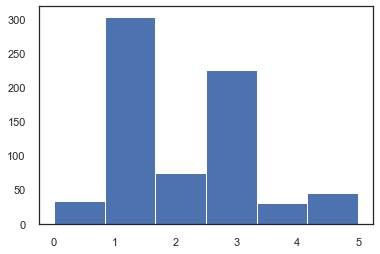

In [22]:
x = ed_field_1['EducationField']
plt.hist(x, bins=6)

* Human Resources: 0
* ***Life Sciences***: 1
* Marketing: 2
* ***Medical***: 3
* Other: 4
* Technical Degree: 5

In [23]:
general

Age  Attrition     BusinessTravel              Department  \
0      51        0.0      Travel_Rarely                   Sales   
1      31        1.0  Travel_Frequently  Research & Development   
2      32        0.0  Travel_Frequently  Research & Development   
3      38        0.0         Non-Travel  Research & Development   
4      32        0.0      Travel_Rarely  Research & Development   
...   ...        ...                ...                     ...   
4405   42        0.0      Travel_Rarely  Research & Development   
4406   29        0.0      Travel_Rarely  Research & Development   
4407   25        0.0      Travel_Rarely  Research & Development   
4408   42        0.0      Travel_Rarely                   Sales   
4409   40        0.0      Travel_Rarely  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeID  Gender  \
0                    6          2  Life Sciences           1     0.0   
1                   10          1  Life Sciences           2     0.0   
2                   17          4          Other           3     1.0   
3                    2          5  Life Sciences           4     1.0   
4                   10          1        Medical           5     1.0   
...                ...        ...            ...         ...     ...   
4405                 5          4        Medical        4406     0.0   
4406                 2          4        Medical        4407     1.0   
4407                25          2  Life Sciences        4408     1.0   
4408                18          2        Medical        4409     1.0   
4409                28          3        Medical        4410     1.0   

      JobLevel                    JobRole MaritalStatus  MonthlyIncome  \
0            1  Healthcare Representative       Married         131160   
1            1         Research Scientist        Single          41890   
2            4            Sales Executive       Married         193280   
3            3            Human Resources       Married          83210   
4            1            Sales Executive        Single          23420   
...        ...                        ...           ...            ...   
4405         1         Research Scientist        Single          60290   
4406         1      Laboratory Technician      Divorced          26790   
4407         2            Sales Executive       Married          37020   
4408         1      Laboratory Technician      Divorced          23980   
4409         2      Laboratory Technician      Divorced          54680   

      NumCompaniesWorked  PercentSalaryHike  StandardHours  StockOptionLevel  \
0                    1.0                 11              8                 0   
1                    0.0                 23              8                 1   
2                    1.0                 15              8                 3   
3                    3.0                 11              8                 3   
4                    4.0                 12              8                 2   
...                  ...                ...            ...               ...   
4405                 3.0                 17              8                 1   
4406                 2.0                 15              8                 0   
4407                 0.0                 20              8                 0   
4408                 0.0                 14              8                 1   
4409                 0.0                 12              8                 0   

      TotalWorkingYears  TrainingTimesLastYear  YearsAtCompany  \
0                   1.0                      6               1   
1                   6.0                      3               5   
2                   5.0                      2               5   
3                  13.0                      5               8   
4                   9.0                      2               6   
...                 ...                    ...             ...   
4405               10.0 

# Isolate the Department Column for Analysis

In [131]:
department = general.loc[:,('Attrition', 'Department')]
department.head()

Attrition              Department
0        0.0                   Sales
1        1.0  Research & Development
2        0.0  Research & Development
3        0.0  Research & Development
4        0.0  Research & Development

In [137]:
set(department['Department'].values)

{'Human Resources', 'Research & Development', 'Sales'}

In [138]:
department['Department'] = department['Department'].astype('category')

In [139]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
department['Department'] = lb_make.fit_transform(department['Department'])

In [140]:
department['count'] = np.ones((range(len(department['Department']),0)))

In [152]:
department.head()

Attrition  Department  count
0        0.0           2    1.0
1        1.0           1    1.0
2        0.0           1    1.0
3        0.0           1    1.0
4        0.0           1    1.0

In [141]:
department_1 = department[department['Attrition'] == 1]

In [142]:
department_1.groupby(['Attrition', 'Department']).count()

count
Attrition Department       
1.0       0              57
          1             453
          2             201

(array([ 57.,   0., 453.,   0., 201.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. ]),
 <a list of 5 Patch objects>)

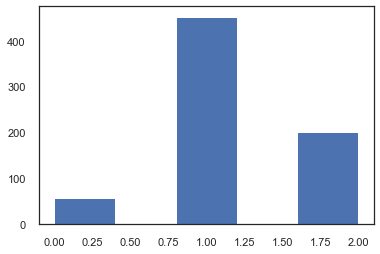

In [145]:
x = department_1['Department']
plt.hist(x, bins=5)

*  Human Resources: 0
*  ***Research & Development***: 1
*  Sales: 2

In [165]:
def categorical(df, target, category):
    new_df = df.loc[:,(target, category)]
    values = set(new_df[category].values)
    print(values)
    print(new_df.head(50))
    new_df[category] = new_df[category].astype('category')
    lb_make = LabelEncoder()
    new_df[category] = lb_make.fit_transform(new_df[category])
    print(new_df.head(50))
    new_df['count'] = np.ones((range(len(new_df[category]),0)))
    new_df_1 = new_df[new_df[target] == 1]
    new_df_1.groupby([target, category]).count()
    x = new_df_1[category]
    return new_df_1.groupby([target, category]).count(), plt.hist(x, bins=len(values))

{'Travel_Rarely', 'Non-Travel', 'Travel_Frequently'}
    Attrition     BusinessTravel
0         0.0      Travel_Rarely
1         1.0  Travel_Frequently
2         0.0  Travel_Frequently
3         0.0         Non-Travel
4         0.0      Travel_Rarely
5         0.0      Travel_Rarely
6         1.0      Travel_Rarely
7         0.0      Travel_Rarely
8         0.0      Travel_Rarely
9         0.0         Non-Travel
10        0.0      Travel_Rarely
11        0.0      Travel_Rarely
12        0.0      Travel_Rarely
13        1.0         Non-Travel
14        0.0      Travel_Rarely
15        0.0      Travel_Rarely
16        0.0      Travel_Rarely
17        0.0         Non-Travel
18        0.0      Travel_Rarely
19        0.0      Travel_Rarely
20        0.0  Travel_Frequently
21        0.0      Travel_Rarely
22        0.0      Travel_Rarely
23        0.0      Travel_Rarely
24        0.0  Travel_Frequently
25        0.0      Travel_Rarely
26        0.0  Travel_Frequently
27        0.0      Trav

(                          count
 Attrition BusinessTravel       
 1.0       0                  36
           1                 207
           2                 468,
 (array([ 36., 207., 468.]),
  array([0.        , 0.66666667, 1.33333333, 2.        ]),
  <a list of 3 Patch objects>))

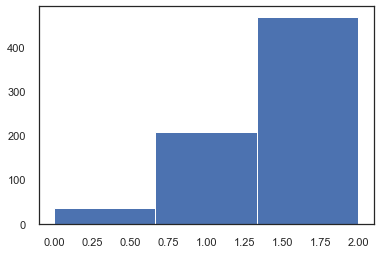

In [167]:
categorical(general, 'Attrition', 'BusinessTravel')

*  Non-Travel: 0
*  Travel_Frequently: 1
*  ***Travel_Rarely***: 2

{'Research Director', 'Healthcare Representative', 'Research Scientist', 'Manager', 'Human Resources', 'Manufacturing Director', 'Sales Representative', 'Laboratory Technician', 'Sales Executive'}
    Attrition                    JobRole
0         0.0  Healthcare Representative
1         1.0         Research Scientist
2         0.0            Sales Executive
3         0.0            Human Resources
4         0.0            Sales Executive
5         0.0          Research Director
6         1.0            Sales Executive
7         0.0            Sales Executive
8         0.0      Laboratory Technician
9         0.0      Laboratory Technician
10        0.0      Laboratory Technician
11        0.0      Laboratory Technician
12        0.0            Sales Executive
13        1.0         Research Scientist
14        0.0     Manufacturing Director
15        0.0  Healthcare Representative
16        0.0      Laboratory Technician
17        0.0            Sales Executive
18        0.0       Sale

(                   count
 Attrition JobRole       
 1.0       0           57
           1           21
           2          126
           3           42
           4           48
           5           57
           6          159
           7          165
           8           36,
 (array([ 57.,  21., 126.,  42.,  48.,  57., 159., 165.,  36.]),
  array([0.        , 0.88888889, 1.77777778, 2.66666667, 3.55555556,
         4.44444444, 5.33333333, 6.22222222, 7.11111111, 8.        ]),
  <a list of 9 Patch objects>))

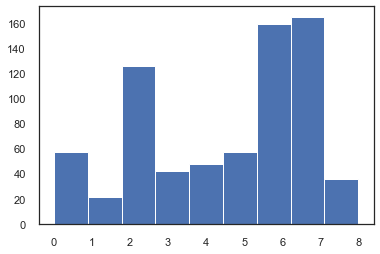

In [168]:
categorical(general, 'Attrition', 'JobRole')

*  Healthcare Representative: 0
*  Human Resources: 1
*  ***Laboratory Technician***: 2
*  Manager: 3
*  Manufacturing Director: 4
*  Research Director: 5
*  ***Research Scientist***: 6
*  ***Sales Executive***: 7
*  Sales Representative: 8

{'Divorced', 'Married', 'Single'}
    Attrition MaritalStatus
0         0.0       Married
1         1.0        Single
2         0.0       Married
3         0.0       Married
4         0.0        Single
5         0.0       Married
6         1.0        Single
7         0.0       Married
8         0.0       Married
9         0.0      Divorced
10        0.0       Married
11        0.0       Married
12        0.0        Single
13        1.0       Married
14        0.0       Married
15        0.0       Married
16        0.0        Single
17        0.0      Divorced
18        0.0      Divorced
19        0.0      Divorced
20        0.0      Divorced
21        0.0      Divorced
22        0.0       Married
23        0.0       Married
24        0.0        Single
25        0.0       Married
26        0.0       Married
27        0.0        Single
28        1.0      Divorced
29        0.0      Divorced
30        1.0      Divorced
31        0.0        Single
32        0.0        Single
33        0.0 

(                         count
 Attrition MaritalStatus       
 1.0       0                 99
           1                252
           2                360,
 (array([ 99., 252., 360.]),
  array([0.        , 0.66666667, 1.33333333, 2.        ]),
  <a list of 3 Patch objects>))

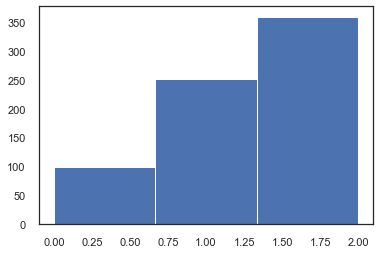

In [169]:
categorical(general, 'Attrition', 'MaritalStatus')

*  Divorced: 0
*  Married: 1
*  ***Single***: 2

USE Chi-Squared!!!

# Time In & Out Data

Identify average clock in time for each employee.

In [72]:
time_in = pd.read_csv('in_time.csv')

In [73]:
time_in.head()

Unnamed: 0  2015-01-01           2015-01-02           2015-01-05  \
0           1         NaN  2015-01-02 09:43:45  2015-01-05 10:08:48   
1           2         NaN  2015-01-02 10:15:44  2015-01-05 10:21:05   
2           3         NaN  2015-01-02 10:17:41  2015-01-05 09:50:50   
3           4         NaN  2015-01-02 10:05:06  2015-01-05 09:56:32   
4           5         NaN  2015-01-02 10:28:17  2015-01-05 09:49:58   

            2015-01-06           2015-01-07           2015-01-08  \
0  2015-01-06 09:54:26  2015-01-07 09:34:31  2015-01-08 09:51:09   
1                  NaN  2015-01-07 09:45:17  2015-01-08 10:09:04   
2  2015-01-06 10:14:13  2015-01-07 09:47:27  2015-01-08 10:03:40   
3  2015-01-06 10:11:07  2015-01-07 09:37:30  2015-01-08 10:02:08   
4  2015-01-06 09:45:28  2015-01-07 09:49:37  2015-01-08 10:19:44   

            2015-01-09           2015-01-12           2015-01-13  2015-01-14  \
0  2015-01-09 10:09:25  2015-01-12 09:42:53  2015-01-13 10:13:06         NaN   
1  2015-01-09 09:43:26  2015-01-12 10:00:07  2015-01-13 10:43:29         NaN   
2  2015-01-09 10:05:49  2015-01-12 10:03:47  2015-01-13 10:21:26         NaN   
3  2015-01-09 10:08:12  2015-01-12 10:13:42  2015-01-13 09:53:22         NaN   
4  2015-01-09 10:00:50  2015-01-12 10:29:27  2015-01-13 09:59:32         NaN   

            2015-01-15           2015-01-16           2015-01-19  \
0  2015-01-15 10:01:24  2015-01-16 10:19:08                  NaN   
1  2015-01-15 09:37:57  2015-01-16 09:57:18  2015-01-19 10:23:43   
2  2015-01-15 09:55:11  2015-01-16 10:05:36  2015-01-19 09:47:53   
3  2015-01-15 10:00:50  2015-01-16 09:58:06  2015-01-19 09:43:11   
4  2015-01-15 10:06:12  2015-01-16 10:03:50                  NaN   

            2015-01-20           2015-01-21           2015-01-22  \
0  2015-01-20 09:50:34  2015-01-21 09:49:42  2015-01-22 09:47:45   
1  2015-01-20 09:29:03  2015-01-21 09:46:45  2015-01-22 10:03:51   
2  2015-01-20 09:57:09  2015-01-21 10:29:40  2015-01-22 09:59:11   
3  2015-01-20 10:29:06  2015-01-21 10:04:33  2015-01-22 09:51:07   
4  2015-01-20 10:10:29  2015-01-21 10:28:15  2015-01-22 10:10:10   

            2015-01-23  2015-01-26           2015-01-27           2015-01-28  \
0  2015-01-23 09:23:44         NaN  2015-01-27 09:50:37  2015-01-28 09:56:13   
1  2015-01-23 09:20:06         NaN  2015-01-27 10:07:48  2015-01-28 10:08:25   
2  2015-01-23 10:16:34         NaN  2015-01-27 10:07:30  2015-01-28 10:05:43   
3  2015-01-23 09:56:56         NaN  2015-01-27 09:48:31  2015-01-28 10:00:39   
4  2015-01-23 09:34:34         NaN  2015-01-27 09:56:59  2015-01-28 09:45:03   

            2015-01-29           2015-01-30           2015-02-02  \
0  2015-01-29 09:53:47  2015-01-30 10:09:26  2015-02-02 09:38:43   
1  2015-01-29 09:52:04  2015-01-30 09:49:49  2015-02-02 10:07:26   
2  2015-01-29 10:06:48  2015-01-30 10:14:36  2015-02-02 09:54:45   
3  2015-01-29 09:49:28  2015-01-30 09:56:31  2015-02-02 10:14:08   
4  2015-01-29 10:11:41  2015-01-30 10:24:50  2015-02-02 09:43:27   

            2015-02-03           2015-02-04           2015-02-05  \
0  2015-02-03 10:23:38  2015-02-04 09:48:37  2015-02-05 09:52:36   
1  2015-02-03 09:55:45  2015-02-04 10:25:41  2015-02-05 10:05:11   
2  2015-02-03 09:27:11  2015-02-04 10:04:03  2015-02-05 10:08:11   
3  2015-02-03 10:01:31  2015-02-04 10:31:44  2015-02-05 10:02:39   
4  2015-02-03 09:55:59  2015-02-04 10:03:25  2015-02-05 10:02:17   

            2015-02-06           2015-02-09           2015-02-10  \
0  2015-02-06 09:53:23  2015-02-09 10:01:45  2015-02-10 10:14:18   
1  2015-02-06 09:12:39                  NaN  2015-02-10 10:10:13   
2  2015-02-06 10:23:51  2015-02-09 10:08:43  2015-02-10 10:26:18   
3  2015-02-06 09:24:21  2015-02-09 09:56:27                  NaN   
4  2015-02-06 09:55:43  2015-02-09 10:15:16  2015-02-10 09:43:48   

            2015-02-11           2015-02-12           2015-02-13  \
0  2015-02-11 10:18:44  2015-02-12 10:10:35  2015-02-13 09:13:07   
1  2015-02-11 09:40:20  

In [74]:
time_in.isnull().sum()

Unnamed: 0       0
2015-01-01    4410
2015-01-02     209
2015-01-05     206
2015-01-06     228
              ... 
2015-12-25    4410
2015-12-28     234
2015-12-29     230
2015-12-30     265
2015-12-31     213
Length: 262, dtype: int64

# Time Out Data

In [75]:
time_out = pd.read_csv('out_time.csv')

In [76]:
time_out

Unnamed: 0  2015-01-01           2015-01-02           2015-01-05  \
0              1         NaN  2015-01-02 16:56:15  2015-01-05 17:20:11   
1              2         NaN  2015-01-02 18:22:17  2015-01-05 17:48:22   
2              3         NaN  2015-01-02 16:59:14  2015-01-05 17:06:46   
3              4         NaN  2015-01-02 17:25:24  2015-01-05 17:14:03   
4              5         NaN  2015-01-02 18:31:37  2015-01-05 17:49:15   
...          ...         ...                  ...                  ...   
4405        4406         NaN  2015-01-02 17:27:37  2015-01-05 19:08:20   
4406        4407         NaN  2015-01-02 16:19:01                  NaN   
4407        4408         NaN  2015-01-02 17:17:35  2015-01-05 17:08:07   
4408        4409         NaN  2015-01-02 19:48:37  2015-01-05 19:37:40   
4409        4410         NaN  2015-01-02 16:49:19  2015-01-05 17:33:02   

               2015-01-06           2015-01-07           2015-01-08  \
0     2015-01-06 17:19:05  2015-01-07 16:34:55  2015-01-08 17:08:32   
1                     NaN  2015-01-07 17:09:06  2015-01-08 17:34:04   
2     2015-01-06 16:38:32  2015-01-07 16:33:21  2015-01-08 17:24:22   
3     2015-01-06 17:07:42  2015-01-07 16:32:40  2015-01-08 16:53:11   
4     2015-01-06 17:26:25  2015-01-07 17:37:59  2015-01-08 17:59:28   
...                   ...                  ...                  ...   
4405  2015-01-06 18:50:49  2015-01-07 18:57:40  2015-01-08 17:58:31   
4406  2015-01-06 15:07:37  2015-01-07 15:25:50  2015-01-08 16:12:33   
4407  2015-01-06 17:27:46  2015-01-07 18:27:22  2015-01-08 17:05:25   
4408  2015-01-06 20:00:08  2015-01-07 19:35:59  2015-01-08 18:55:13   
4409  2015-01-06 16:36:10  2015-01-07 16:33:47  2015-01-08 17:32:31   

               2015-01-09           2015-01-12           2015-01-13  \
0     2015-01-09 17:38:29  2015-01-12 16:58:39  2015-01-13 18:02:58   
1     2015-01-09 16:52:29  2015-01-12 17:36:48  2015-01-13 18:00:13   
2     2015-01-09 16:57:30  2015-01-12 17:28:54  2015-01-13 17:21:25   
3     2015-01-09 17:19:47  2015-01-12 17:13:37  2015-01-13 17:11:45   
4     2015-01-09 17:44:08  2015-01-12 18:51:21  2015-01-13 18:14:58   
...                   ...                  ...                  ...   
4405  2015-01-09 18:06:15  2015-01-12 17:58:48  2015-01-13 18:10:35   
4406  2015-01-09 15:26:56  2015-01-12 16:10:42  2015-01-13 16:22:43   
4407  2015-01-09 17:02:57  2015-01-12 17:35:45  2015-01-13 17:15:52   
4408                  NaN  2015-01-12 19:18:17  2015-01-13 19:24:02   
4409  2015-01-09 17:25:58  2015-01-12 16:39:21  2015-01-13 16:59:28   

      2015-01-14           2015-01-15           2015-01-16  \
0            NaN  2015-01-15 17:22:13  2015-01-16 17:35:11   
1            NaN  2015-01-15 17:14:44  2015-01-16 17:40:57   
2            NaN  2015-01-15 17:21:29  2015-01-16 17:18:13   
3            NaN  2015-01-15 16:53:26  2015-01-16 16:52:34   
4            NaN  2015-01-15 18:21:48  2015-01-16 18:28:03   
...          ...                  ...                  ...   
4405         NaN  2015-01-15 17:50:37  2015-01-16 18:50:04   
4406         NaN  2015-01-15 16:19:00  2015-01-16 15:30:38   
4407         NaN  2015-01-15 18:15:53  2015-01-16 18:00:37   
4408         NaN  2015-01-15 18:33:21  2015-01-16 19:24:36   
4409         NaN  2015-01-15 17:13:51  2015-01-16 16:46:25   

               2015-01-19           2015-01-20           2015-01-21  \
0                     NaN  2015-01-20 16:37:07  2015-01-21 16:55:24   
1     2015-01-19 17:58:22  2015-01-20 17:05:13  2015-01-21 17:41:05   
2     2015-01-19 16:52:13  2015-01-20 16:52:23  2015-01-21 17:17:50   
3     2015-01-19 16:14:18  2015-01-20 17:39:50  2015-01-21 16:46:51   
4                     NaN  2015-01-20 17:59:24  2015-01-21 18:41:38   
...                   ...                  ...                  ...   
4405  2015-01-19 19:18:24  2015-01-20 18:41:28  2015-01-21 18:51:02   
4406  2015-01-19 15:42:04  2015-01-20 16:02:30  2015-01-21 16:05:25   
4407  2015-01-19 17:59:39  

In [77]:
# combines both time_in and time_out datasets into one dataset.
log_time = [time_in, time_out]

In [79]:
# let's see if the log_time datasets have also EmployeeID column:
for dataset in log_time:
    print(dataset.columns)
    print('-'*50)

    # we see in the output that both datasets have the same column names (1 unnamed + dates).

Index(['Unnamed: 0', '2015-01-01', '2015-01-02', '2015-01-05', '2015-01-06',
       '2015-01-07', '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
       ...
       '2015-12-18', '2015-12-21', '2015-12-22', '2015-12-23', '2015-12-24',
       '2015-12-25', '2015-12-28', '2015-12-29', '2015-12-30', '2015-12-31'],
      dtype='object', length=262)
--------------------------------------------------
Index(['Unnamed: 0', '2015-01-01', '2015-01-02', '2015-01-05', '2015-01-06',
       '2015-01-07', '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
       ...
       '2015-12-18', '2015-12-21', '2015-12-22', '2015-12-23', '2015-12-24',
       '2015-12-25', '2015-12-28', '2015-12-29', '2015-12-30', '2015-12-31'],
      dtype='object', length=262)
--------------------------------------------------


In [80]:
# Let's replace our unnamed columns with "EmployeeID"
for dataset in log_time:
    dataset.rename(columns={'Unnamed: 0':'EmployeeID'}, inplace=True)

#now in all 5 datasets we have common 'EmployeeID' column containing 4410 unique values.

In [81]:
time_in.head()

EmployeeID  2015-01-01           2015-01-02           2015-01-05  \
0           1         NaN  2015-01-02 09:43:45  2015-01-05 10:08:48   
1           2         NaN  2015-01-02 10:15:44  2015-01-05 10:21:05   
2           3         NaN  2015-01-02 10:17:41  2015-01-05 09:50:50   
3           4         NaN  2015-01-02 10:05:06  2015-01-05 09:56:32   
4           5         NaN  2015-01-02 10:28:17  2015-01-05 09:49:58   

            2015-01-06           2015-01-07           2015-01-08  \
0  2015-01-06 09:54:26  2015-01-07 09:34:31  2015-01-08 09:51:09   
1                  NaN  2015-01-07 09:45:17  2015-01-08 10:09:04   
2  2015-01-06 10:14:13  2015-01-07 09:47:27  2015-01-08 10:03:40   
3  2015-01-06 10:11:07  2015-01-07 09:37:30  2015-01-08 10:02:08   
4  2015-01-06 09:45:28  2015-01-07 09:49:37  2015-01-08 10:19:44   

            2015-01-09           2015-01-12           2015-01-13  2015-01-14  \
0  2015-01-09 10:09:25  2015-01-12 09:42:53  2015-01-13 10:13:06         NaN   
1  2015-01-09 09:43:26  2015-01-12 10:00:07  2015-01-13 10:43:29         NaN   
2  2015-01-09 10:05:49  2015-01-12 10:03:47  2015-01-13 10:21:26         NaN   
3  2015-01-09 10:08:12  2015-01-12 10:13:42  2015-01-13 09:53:22         NaN   
4  2015-01-09 10:00:50  2015-01-12 10:29:27  2015-01-13 09:59:32         NaN   

            2015-01-15           2015-01-16           2015-01-19  \
0  2015-01-15 10:01:24  2015-01-16 10:19:08                  NaN   
1  2015-01-15 09:37:57  2015-01-16 09:57:18  2015-01-19 10:23:43   
2  2015-01-15 09:55:11  2015-01-16 10:05:36  2015-01-19 09:47:53   
3  2015-01-15 10:00:50  2015-01-16 09:58:06  2015-01-19 09:43:11   
4  2015-01-15 10:06:12  2015-01-16 10:03:50                  NaN   

            2015-01-20           2015-01-21           2015-01-22  \
0  2015-01-20 09:50:34  2015-01-21 09:49:42  2015-01-22 09:47:45   
1  2015-01-20 09:29:03  2015-01-21 09:46:45  2015-01-22 10:03:51   
2  2015-01-20 09:57:09  2015-01-21 10:29:40  2015-01-22 09:59:11   
3  2015-01-20 10:29:06  2015-01-21 10:04:33  2015-01-22 09:51:07   
4  2015-01-20 10:10:29  2015-01-21 10:28:15  2015-01-22 10:10:10   

            2015-01-23  2015-01-26           2015-01-27           2015-01-28  \
0  2015-01-23 09:23:44         NaN  2015-01-27 09:50:37  2015-01-28 09:56:13   
1  2015-01-23 09:20:06         NaN  2015-01-27 10:07:48  2015-01-28 10:08:25   
2  2015-01-23 10:16:34         NaN  2015-01-27 10:07:30  2015-01-28 10:05:43   
3  2015-01-23 09:56:56         NaN  2015-01-27 09:48:31  2015-01-28 10:00:39   
4  2015-01-23 09:34:34         NaN  2015-01-27 09:56:59  2015-01-28 09:45:03   

            2015-01-29           2015-01-30           2015-02-02  \
0  2015-01-29 09:53:47  2015-01-30 10:09:26  2015-02-02 09:38:43   
1  2015-01-29 09:52:04  2015-01-30 09:49:49  2015-02-02 10:07:26   
2  2015-01-29 10:06:48  2015-01-30 10:14:36  2015-02-02 09:54:45   
3  2015-01-29 09:49:28  2015-01-30 09:56:31  2015-02-02 10:14:08   
4  2015-01-29 10:11:41  2015-01-30 10:24:50  2015-02-02 09:43:27   

            2015-02-03           2015-02-04           2015-02-05  \
0  2015-02-03 10:23:38  2015-02-04 09:48:37  2015-02-05 09:52:36   
1  2015-02-03 09:55:45  2015-02-04 10:25:41  2015-02-05 10:05:11   
2  2015-02-03 09:27:11  2015-02-04 10:04:03  2015-02-05 10:08:11   
3  2015-02-03 10:01:31  2015-02-04 10:31:44  2015-02-05 10:02:39   
4  2015-02-03 09:55:59  2015-02-04 10:03:25  2015-02-05 10:02:17   

            2015-02-06           2015-02-09           2015-02-10  \
0  2015-02-06 09:53:23  2015-02-09 10:01:45  2015-02-10 10:14:18   
1  2015-02-06 09:12:39                  NaN  2015-02-10 10:10:13   
2  2015-02-06 10:23:51  2015-02-09 10:08:43  2015-02-10 10:26:18   
3  2015-02-06 09:24:21  2015-02-09 09:56:27                  NaN   
4  2015-02-06 09:55:43  2015-02-09 10:15:16  2015-02-10 09:43:48   

            2015-02-11           2015-02-12           2015-02-13  \
0  2015-02-11 10:18:44  2015-02-12 10:10:35  2015-02-13 09:13:07   
1  2015-02-11 09:40:20  

In [82]:
# let's make sure that in every set we have the same 'EmployeeID' values:

print(len(set(general['EmployeeID']).intersection(emp['EmployeeID']).intersection(mng['EmployeeID']).intersection(time_in['EmployeeID']).intersection(time_out['EmployeeID'])))

# we have 4410 (all) common unique values in 'EmployeeID' column for all 5 datasets. Now, we can set the 'EmployeeID' column as an index:

4410


In [83]:
for dataset in log_time:
    dataset.set_index('EmployeeID', inplace=True)

In [84]:
time_in.head()

2015-01-01           2015-01-02           2015-01-05  \
EmployeeID                                                         
1                  NaN  2015-01-02 09:43:45  2015-01-05 10:08:48   
2                  NaN  2015-01-02 10:15:44  2015-01-05 10:21:05   
3                  NaN  2015-01-02 10:17:41  2015-01-05 09:50:50   
4                  NaN  2015-01-02 10:05:06  2015-01-05 09:56:32   
5                  NaN  2015-01-02 10:28:17  2015-01-05 09:49:58   

                     2015-01-06           2015-01-07           2015-01-08  \
EmployeeID                                                                  
1           2015-01-06 09:54:26  2015-01-07 09:34:31  2015-01-08 09:51:09   
2                           NaN  2015-01-07 09:45:17  2015-01-08 10:09:04   
3           2015-01-06 10:14:13  2015-01-07 09:47:27  2015-01-08 10:03:40   
4           2015-01-06 10:11:07  2015-01-07 09:37:30  2015-01-08 10:02:08   
5           2015-01-06 09:45:28  2015-01-07 09:49:37  2015-01-08 10:19:44   

                     2015-01-09           2015-01-12           2015-01-13  \
EmployeeID                                                                  
1           2015-01-09 10:09:25  2015-01-12 09:42:53  2015-01-13 10:13:06   
2           2015-01-09 09:43:26  2015-01-12 10:00:07  2015-01-13 10:43:29   
3           2015-01-09 10:05:49  2015-01-12 10:03:47  2015-01-13 10:21:26   
4           2015-01-09 10:08:12  2015-01-12 10:13:42  2015-01-13 09:53:22   
5           2015-01-09 10:00:50  2015-01-12 10:29:27  2015-01-13 09:59:32   

            2015-01-14           2015-01-15           2015-01-16  \
EmployeeID                                                         
1                  NaN  2015-01-15 10:01:24  2015-01-16 10:19:08   
2                  NaN  2015-01-15 09:37:57  2015-01-16 09:57:18   
3                  NaN  2015-01-15 09:55:11  2015-01-16 10:05:36   
4                  NaN  2015-01-15 10:00:50  2015-01-16 09:58:06   
5                  NaN  2015-01-15 10:06:12  2015-01-16 10:03:50   

                     2015-01-19           2015-01-20           2015-01-21  \
EmployeeID                                                                  
1                           NaN  2015-01-20 09:50:34  2015-01-21 09:49:42   
2           2015-01-19 10:23:43  2015-01-20 09:29:03  2015-01-21 09:46:45   
3           2015-01-19 09:47:53  2015-01-20 09:57:09  2015-01-21 10:29:40   
4           2015-01-19 09:43:11  2015-01-20 10:29:06  2015-01-21 10:04:33   
5                           NaN  2015-01-20 10:10:29  2015-01-21 10:28:15   

                     2015-01-22           2015-01-23  2015-01-26  \
EmployeeID                                                         
1           2015-01-22 09:47:45  2015-01-23 09:23:44         NaN   
2           2015-01-22 10:03:51  2015-01-23 09:20:06         NaN   
3           2015-01-22 09:59:11  2015-01-23 10:16:34         NaN   
4           2015-01-22 09:51:07  2015-01-23 09:56:56         NaN   
5           2015-01-22 10:10:10  2015-01-23 09:34:34         NaN   

                     2015-01-27           2015-01-28           2015-01-29  \
EmployeeID                                                                  
1           2015-01-27 09:50:37  2015-01-28 09:56:13  2015-01-29 09:53:47   
2           2015-01-27 10:07:48  2015-01-28 10:08:25  2015-01-29 09:52:04   
3           2015-01-27 10:07:30  2015-01-28 10:05:43  2015-01-29 10:06:48   
4           2015-01-27 09:48:31  2015-01-28 10:00:39  2015-01-29 09:49:28   
5           2015-01-27 09:56:59  2015-01-28 09:45:03  2015-01-29 10:11:41   

                     2015-01-30           2015-02-02           2015-02-03  \
EmployeeID                                                                  
1           2015-01-30 10:09:26  2015-02-02 09:38:43  2015-02-03 10:23:38   
2           2015-01-30 09:49:49  2015-02-02 10:07:26  2015-02-03 09:55:45   
3           2015-01-30 10:14:36  2015-02-02 09:54:45  2015-02-03 09:27:11   
4           2015-01-30 09:56:31  201

In [85]:
# transposing dataframes to perform calculations:
time_out_transposed = time_out.T
time_in_transposed = time_in.T

In [86]:
time_in_transposed.head()

EmployeeID                 1                    2                    3     \
2015-01-01                  NaN                  NaN                  NaN   
2015-01-02  2015-01-02 09:43:45  2015-01-02 10:15:44  2015-01-02 10:17:41   
2015-01-05  2015-01-05 10:08:48  2015-01-05 10:21:05  2015-01-05 09:50:50   
2015-01-06  2015-01-06 09:54:26                  NaN  2015-01-06 10:14:13   
2015-01-07  2015-01-07 09:34:31  2015-01-07 09:45:17  2015-01-07 09:47:27   

EmployeeID                 4                    5                    6     \
2015-01-01                  NaN                  NaN                  NaN   
2015-01-02  2015-01-02 10:05:06  2015-01-02 10:28:17  2015-01-02 09:43:08   
2015-01-05  2015-01-05 09:56:32  2015-01-05 09:49:58  2015-01-05 10:14:00   
2015-01-06  2015-01-06 10:11:07  2015-01-06 09:45:28  2015-01-06 10:08:42   
2015-01-07  2015-01-07 09:37:30  2015-01-07 09:49:37  2015-01-07 10:18:15   

EmployeeID                 7                    8                    9     \
2015-01-01                  NaN                  NaN                  NaN   
2015-01-02  2015-01-02 10:20:13  2015-01-02 09:57:10                  NaN   
2015-01-05  2015-01-05 09:30:01  2015-01-05 09:48:56  2015-01-05 10:01:42   
2015-01-06  2015-01-06 09:48:47  2015-01-06 09:54:04  2015-01-06 09:50:56   
2015-01-07  2015-01-07 09:46:18  2015-01-07 09:52:31  2015-01-07 10:02:57   

EmployeeID                 10                   11                   12    \
2015-01-01                  NaN                  NaN                  NaN   
2015-01-02  2015-01-02 09:55:53  2015-01-02 09:57:48  2015-01-02 09:37:33   
2015-01-05  2015-01-05 10:21:06  2015-01-05 10:00:35  2015-01-05 10:27:04   
2015-01-06  2015-01-06 10:03:01  2015-01-06 10:40:08  2015-01-06 09:47:47   
2015-01-07  2015-01-07 10:06:01  2015-01-07 09:48:52  2015-01-07 09:32:46   

EmployeeID                 13                   14                   15    \
2015-01-01                  NaN                  NaN                  NaN   
2015-01-02                  NaN  2015-01-02 10:15:31  2015-01-02 09:54:30   
2015-01-05  2015-01-05 09:58:51  2015-01-05 10:07:45  2015-01-05 10:11:12   
2015-01-06  2015-01-06 09:57:02  2015-01-06 09:51:45  2015-01-06 09:44:02   
2015-01-07                  NaN  2015-01-07 10:34:41  2015-01-07 09:51:12   

EmployeeID                 16                   17                   18    \
2015-01-01                  NaN                  NaN                  NaN   
2015-01-02  2015-01-02 09:47:51  2015-01-02 10:08:00  2015-01-02 10:18:02   
2015-01-05  2015-01-05 09:54:34  2015-01-05 09:59:14  2015-01-05 10:01:45   
2015-01-06  2015-01-06 10:38:02  2015-01-06 10:00:51                  NaN   
2015-01-07  2015-01-07 10:31:11  2015-01-07 10:30:37  2015-01-07 09:41:42   

EmployeeID                 19                   20                   21    \
2015-01-01                  NaN                  NaN                  NaN   
2015-01-02  2015-01-02 10:27:00  2015-01-02 09:49:37  2015-01-02 10:01:07   
2015-01-05  2015-01-05 10:23:10  2015-01-05 10:23:07  2015-01-05 09:47:36   
2015-01-06  2015-01-06 10:05:45  2015-01-06 10:41:38  2015-01-06 10:14:40   
2015-01-07  2015-01-07 10:18:26  2015-01-07 10:11:02  2015-01-07 09:49:46   

EmployeeID                 22                   23                   24    \
2015-01-01                  NaN                  NaN                  NaN   
2015-01-02  2015-01-02 09:35:02  2015-01-02 10:03:47  2015-01-02 09:42:07   
2015-01-05  2015-01-05 09:36:53  2015-01-05 09:48:30  2015-01-05 10:08:12   
2015-01-06  2015-01-06 10:10:40                  NaN  2015-01-06 10:03:02   
2015-01-07  2015-01-07 10:03:36  2015-01-07 10:03:25  2015-01-07 10:28:11   

EmployeeID                 25                   26                   27    \
2015-01-01                  NaN                  NaN                  NaN   
2015-01-02  2015-01-02 09:54:16  2015-01-02 10:31:53  2015-01-02 10:22:11   
2015-01-05  2015-01-05 10:41:15  2015-01-05 09:48:29  2015-01-05 

In [87]:
# changing format of indexes and variables
time_out_transposed.index = pd.to_datetime(time_out_transposed.index)
time_in_transposed.index = pd.to_datetime(time_in_transposed.index)

time_out_transposed = time_out_transposed.apply(pd.to_datetime, errors='raise')
time_in_transposed = time_in_transposed.apply(pd.to_datetime, errors='raise')

In [88]:
time_in_transposed.head()

EmployeeID                1                   2                   3     \
2015-01-01                 NaT                 NaT                 NaT   
2015-01-02 2015-01-02 09:43:45 2015-01-02 10:15:44 2015-01-02 10:17:41   
2015-01-05 2015-01-05 10:08:48 2015-01-05 10:21:05 2015-01-05 09:50:50   
2015-01-06 2015-01-06 09:54:26                 NaT 2015-01-06 10:14:13   
2015-01-07 2015-01-07 09:34:31 2015-01-07 09:45:17 2015-01-07 09:47:27   

EmployeeID                4                   5                   6     \
2015-01-01                 NaT                 NaT                 NaT   
2015-01-02 2015-01-02 10:05:06 2015-01-02 10:28:17 2015-01-02 09:43:08   
2015-01-05 2015-01-05 09:56:32 2015-01-05 09:49:58 2015-01-05 10:14:00   
2015-01-06 2015-01-06 10:11:07 2015-01-06 09:45:28 2015-01-06 10:08:42   
2015-01-07 2015-01-07 09:37:30 2015-01-07 09:49:37 2015-01-07 10:18:15   

EmployeeID                7                   8                   9     \
2015-01-01                 NaT                 NaT                 NaT   
2015-01-02 2015-01-02 10:20:13 2015-01-02 09:57:10                 NaT   
2015-01-05 2015-01-05 09:30:01 2015-01-05 09:48:56 2015-01-05 10:01:42   
2015-01-06 2015-01-06 09:48:47 2015-01-06 09:54:04 2015-01-06 09:50:56   
2015-01-07 2015-01-07 09:46:18 2015-01-07 09:52:31 2015-01-07 10:02:57   

EmployeeID                10                  11                  12    \
2015-01-01                 NaT                 NaT                 NaT   
2015-01-02 2015-01-02 09:55:53 2015-01-02 09:57:48 2015-01-02 09:37:33   
2015-01-05 2015-01-05 10:21:06 2015-01-05 10:00:35 2015-01-05 10:27:04   
2015-01-06 2015-01-06 10:03:01 2015-01-06 10:40:08 2015-01-06 09:47:47   
2015-01-07 2015-01-07 10:06:01 2015-01-07 09:48:52 2015-01-07 09:32:46   

EmployeeID                13                  14                  15    \
2015-01-01                 NaT                 NaT                 NaT   
2015-01-02                 NaT 2015-01-02 10:15:31 2015-01-02 09:54:30   
2015-01-05 2015-01-05 09:58:51 2015-01-05 10:07:45 2015-01-05 10:11:12   
2015-01-06 2015-01-06 09:57:02 2015-01-06 09:51:45 2015-01-06 09:44:02   
2015-01-07                 NaT 2015-01-07 10:34:41 2015-01-07 09:51:12   

EmployeeID                16                  17                  18    \
2015-01-01                 NaT                 NaT                 NaT   
2015-01-02 2015-01-02 09:47:51 2015-01-02 10:08:00 2015-01-02 10:18:02   
2015-01-05 2015-01-05 09:54:34 2015-01-05 09:59:14 2015-01-05 10:01:45   
2015-01-06 2015-01-06 10:38:02 2015-01-06 10:00:51                 NaT   
2015-01-07 2015-01-07 10:31:11 2015-01-07 10:30:37 2015-01-07 09:41:42   

EmployeeID                19                  20                  21    \
2015-01-01                 NaT                 NaT                 NaT   
2015-01-02 2015-01-02 10:27:00 2015-01-02 09:49:37 2015-01-02 10:01:07   
2015-01-05 2015-01-05 10:23:10 2015-01-05 10:23:07 2015-01-05 09:47:36   
2015-01-06 2015-01-06 10:05:45 2015-01-06 10:41:38 2015-01-06 10:14:40   
2015-01-07 2015-01-07 10:18:26 2015-01-07 10:11:02 2015-01-07 09:49:46   

EmployeeID                22                  23                  24    \
2015-01-01                 NaT                 NaT                 NaT   
2015-01-02 2015-01-02 09:35:02 2015-01-02 10:03:47 2015-01-02 09:42:07   
2015-01-05 2015-01-05 09:36:53 2015-01-05 09:48:30 2015-01-05 10:08:12   
2015-01-06 2015-01-06 10:10:40                 NaT 2015-01-06 10:03:02   
2015-01-07 2015-01-07 10:03:36 2015-01-07 10:03:25 2015-01-07 10:28:11   

EmployeeID                25                  26                  27    \
2015-01-01                 NaT                 NaT                 NaT   
2015-01-02 2015-01-02 09:54:16 2015-01-02 10:31:53 2015-01-02 10:22:11   
2015-01-05 2015-01-05 10:41:15 2015-01-05 09:48:29 2015-01-05 10:06:05   
2015-01-06 2015-01-06 10:02:09 2015-01-06 10:13:17 2015-01-06 10:12:51   
2015-01-07 2015-01-07 09:53:16 2015-01-07 10:24:05 2015-01-07 10:04:04

In [90]:
work_time =  time_out_transposed.sub(time_in_transposed)
work_time.head()

EmployeeID     1        2        3        4        5        6        7     \
2015-01-01      NaT      NaT      NaT      NaT      NaT      NaT      NaT   
2015-01-02 07:12:30 08:06:33 06:41:33 07:20:18 08:03:20 10:46:46 06:50:18   
2015-01-05 07:11:23 07:27:17 07:15:56 07:17:31 07:59:17 10:43:19 07:32:18   
2015-01-06 07:24:39      NaT 06:24:19 06:56:35 07:40:57 10:57:49 07:16:00   
2015-01-07 07:00:24 07:23:49 06:45:54 06:55:10 07:48:22 10:17:55 06:25:19   

EmployeeID     8        9        10       11       12       13       14    \
2015-01-01      NaT      NaT      NaT      NaT      NaT      NaT      NaT   
2015-01-02 07:05:25      NaT 07:21:38 07:37:14 07:15:25      NaT 09:15:07   
2015-01-05 07:03:13 06:59:01 07:06:05 07:56:20 07:07:48 09:23:38 09:28:36   
2015-01-06 06:39:09 07:19:05 07:30:54 07:46:07 07:24:00 09:31:25 09:08:46   
2015-01-07 06:49:34 07:33:26 07:09:11 08:40:53 06:52:18      NaT 09:17:22   

EmployeeID     15       16       17       18       19       20       21    \
2015-01-01      NaT      NaT      NaT      NaT      NaT      NaT      NaT   
2015-01-02 06:18:52 06:25:22 06:49:09 10:59:43 06:56:51 09:22:57 07:25:17   
2015-01-05 06:03:01 06:32:17 06:35:19 11:36:25 07:09:01 08:55:32 07:12:29   
2015-01-06 05:45:52 07:05:26 06:41:04      NaT 06:43:56 09:26:15 07:16:20   
2015-01-07 05:59:54 07:09:23 07:00:03 10:59:53 07:08:31 09:03:20 07:47:41   

EmployeeID     22       23       24       25       26       27       28    \
2015-01-01      NaT      NaT      NaT      NaT      NaT      NaT      NaT   
2015-01-02 06:14:56 08:54:43 06:28:02 07:10:58 08:57:58 11:10:58 08:01:27   
2015-01-05 06:16:42 08:17:28 06:59:40 07:36:06 09:04:47 11:09:50 07:44:40   
2015-01-06 06:06:38      NaT 06:42:06 07:23:04 09:26:40 11:29:56 06:56:28   
2015-01-07 05:42:30 08:21:49 07:07:41 07:18:09 09:23:56 11:12:45 07:43:34   

EmployeeID     29       30       31       32       33       34       35    \
2015-01-01      NaT      NaT      NaT      NaT      NaT      NaT      NaT   
2015-01-02 10:46:39      NaT 09:40:14 07:14:28 10:29:40 06:25:07 06:20:10   
2015-01-05 10:27:54 06:50:49 09:55:15 06:24:14 10:51:06 06:05:14 07:09:58   
2015-01-06 11:15:31 07:07:59 10:22:40 06:10:39 10:20:42 06:29:45 06:47:33   
2015-01-07 10:36:19 06:57:00 10:27:50 07:19:52 10:18:40 06:18:53 06:44:27   

EmployeeID     36       37       38       39       40       41       42    \
2015-01-01      NaT      NaT      NaT      NaT      NaT      NaT      NaT   
2015-01-02      NaT 09:44:27 06:18:49 06:13:28 07:15:19 07:28:55 07:50:40   
2015-01-05 10:20:35 09:35:43 06:26:42 07:02:53 08:10:07 06:21:22 07:31:44   
2015-01-06 10:28:02 10:03:46 05:24:31 06:41:37 07:39:51 07:10:07 07:15:25   
2015-01-07      NaT 09:32:37 06:02:33 07:01:44 07:39:07 07:06:24 08:07:40   

EmployeeID     43       44       45       46       47       48       49    \
2015-01-01      NaT      NaT      NaT      NaT      NaT      NaT      NaT   
2015-01-02 07:04:50 07:31:37 07:27:17 07:30:34 07:25:52 07:36:43 07:11:35   
2015-01-05 07:14:55 07:09:59 07:18:22 06:44:48 07:32:15      NaT 06:54:10   
2015-01-06 06:57:03 06:59:51 07:19:59 07:19:09 08:13:29 07:40:48      NaT   
2015-01-07 07:19:59 07:08:08 07:01:57 06:56:22 07:24:27 08:03:32 07:19:22   

EmployeeID     50       51       52       53       54       55       56    \
2015-01-01      NaT      NaT      NaT      NaT      NaT      NaT      NaT   
2015-01-02      NaT 10:47:55 09:33:53 06:37:14 07:44:30 08:36:24 06:46:40   
2015-01-05 06:52:23 10:41:16 09:03:49 06:59:15 07:35:14 08:27:50 06:55:54   
2015-01-06 06:22:51 10:41:31 09:26:13 06:30:46 07:19:15 08:45:58 06:39:22   
2015-01-07 07:06:30 10:54:02 08:51:12 06:45:13 06:45:49 08:29:34 07:07:19   

EmployeeID     57       58       59       60       61       62       63    \
2015-01-01      NaT      NaT      NaT      NaT      NaT      NaT      NaT   
2015-01-02 11:00:27 07:51:49 09:40:14 07:55:37 10:30:57 10:26:02 09:56:28   
2015-01-05 11:33:27 07:25:44 10:29:14 08:01:28 10:36:55 10:29:04 

In [91]:
avg_work_time = work_time.mean()   # this variable will help us to create a new feature ('Overtime') a bit later
avg_work_time.head()

EmployeeID
1   07:22:25.142241
2   07:43:08.288135
3   07:00:47.665289
4   07:11:37.242553
5   08:00:22.228571
dtype: timedelta64[ns]

In [96]:
work_time_df = pd.DataFrame(avg_work_time)

In [129]:
work_time_df

0
EmployeeID                
1          07:22:25.142241
2          07:43:08.288135
3          07:00:47.665289
4          07:11:37.242553
5          08:00:22.228571
...                    ...
4406       08:31:20.197530
4407       06:05:34.634854
4408       07:42:23.874458
4409       09:29:33.340248
4410       06:59:20.211206

[4410 rows x 1 columns]

In [98]:
work_time_df.describe()

0
count                    4410
mean   0 days 07:42:02.850424
std    0 days 01:20:24.784576
min    0 days 05:57:01.814977
25%    0 days 06:40:23.999167
50%    0 days 07:24:24.337947
75%    0 days 08:22:07.329191
max    0 days 11:01:51.457264

# Employee Survey Data

In [38]:
emp = pd.read_csv('employee_survey_data.csv')

In [39]:
emp

EmployeeID  EnvironmentSatisfaction  JobSatisfaction  WorkLifeBalance
0              1                      3.0              4.0              2.0
1              2                      3.0              2.0              4.0
2              3                      2.0              2.0              1.0
3              4                      4.0              4.0              3.0
4              5                      4.0              1.0              3.0
...          ...                      ...              ...              ...
4405        4406                      4.0              1.0              3.0
4406        4407                      4.0              4.0              3.0
4407        4408                      1.0              3.0              3.0
4408        4409                      4.0              1.0              3.0
4409        4410                      1.0              3.0              NaN

[4410 rows x 4 columns]

# Manager Survey Data

In [40]:
mng = pd.read_csv('manager_survey_data.csv')

In [41]:
mng

EmployeeID  JobInvolvement  PerformanceRating
0              1               3                  3
1              2               2                  4
2              3               3                  3
3              4               2                  3
4              5               3                  3
...          ...             ...                ...
4405        4406               3                  3
4406        4407               2                  3
4407        4408               3                  4
4408        4409               2                  3
4409        4410               4                  3

[4410 rows x 3 columns]

In [132]:
survs = pd.merge(emp, mng, on='EmployeeID')

In [133]:
survs

EmployeeID  EnvironmentSatisfaction  JobSatisfaction  WorkLifeBalance  \
0              1                      3.0              4.0              2.0   
1              2                      3.0              2.0              4.0   
2              3                      2.0              2.0              1.0   
3              4                      4.0              4.0              3.0   
4              5                      4.0              1.0              3.0   
...          ...                      ...              ...              ...   
4405        4406                      4.0              1.0              3.0   
4406        4407                      4.0              4.0              3.0   
4407        4408                      1.0              3.0              3.0   
4408        4409                      4.0              1.0              3.0   
4409        4410                      1.0              3.0              NaN   

      JobInvolvement  PerformanceRating  
0                  3                  3  
1                  2                  4  
2                  3                  3  
3                  2                  3  
4                  3                  3  
...              ...                ...  
4405               3                  3  
4406               2                  3  
4407               3                  4  
4408               2                  3  
4409               4                  3  

[4410 rows x 6 columns]

In [134]:
comb = pd.merge(right=survs, left=general, on='EmployeeID', )

In [135]:
comb

Age  Attrition     BusinessTravel              Department  \
0      51        0.0      Travel_Rarely                   Sales   
1      31        1.0  Travel_Frequently  Research & Development   
2      32        0.0  Travel_Frequently  Research & Development   
3      38        0.0         Non-Travel  Research & Development   
4      32        0.0      Travel_Rarely  Research & Development   
...   ...        ...                ...                     ...   
4405   42        0.0      Travel_Rarely  Research & Development   
4406   29        0.0      Travel_Rarely  Research & Development   
4407   25        0.0      Travel_Rarely  Research & Development   
4408   42        0.0      Travel_Rarely                   Sales   
4409   40        0.0      Travel_Rarely  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeID  Gender  \
0                    6          2  Life Sciences           1     0.0   
1                   10          1  Life Sciences           2     0.0   
2                   17          4          Other           3     1.0   
3                    2          5  Life Sciences           4     1.0   
4                   10          1        Medical           5     1.0   
...                ...        ...            ...         ...     ...   
4405                 5          4        Medical        4406     0.0   
4406                 2          4        Medical        4407     1.0   
4407                25          2  Life Sciences        4408     1.0   
4408                18          2        Medical        4409     1.0   
4409                28          3        Medical        4410     1.0   

      JobLevel                    JobRole MaritalStatus  MonthlyIncome  \
0            1  Healthcare Representative       Married         131160   
1            1         Research Scientist        Single          41890   
2            4            Sales Executive       Married         193280   
3            3            Human Resources       Married          83210   
4            1            Sales Executive        Single          23420   
...        ...                        ...           ...            ...   
4405         1         Research Scientist        Single          60290   
4406         1      Laboratory Technician      Divorced          26790   
4407         2            Sales Executive       Married          37020   
4408         1      Laboratory Technician      Divorced          23980   
4409         2      Laboratory Technician      Divorced          54680   

      NumCompaniesWorked  PercentSalaryHike  StandardHours  StockOptionLevel  \
0                    1.0                 11              8                 0   
1                    0.0                 23              8                 1   
2                    1.0                 15              8                 3   
3                    3.0                 11              8                 3   
4                    4.0                 12              8                 2   
...                  ...                ...            ...               ...   
4405                 3.0                 17              8                 1   
4406                 2.0                 15              8                 0   
4407                 0.0                 20              8                 0   
4408                 0.0                 14              8                 1   
4409                 0.0                 12              8                 0   

      TotalWorkingYears  TrainingTimesLastYear  YearsAtCompany  \
0                   1.0                      6               1   
1                   6.0                      3               5   
2                   5.0                      2               5   
3                  13.0                      5               8   
4                   9.0                      2               6   
...                 ...                    ...             ...   
4405               10.0 

In [121]:
comb['AvgWorkTime'] = avg_work_time

In [127]:
comb = pd.merge(right=work_time_df, left=comb, on='EmployeeID', )

In [130]:
comb.drop(columns='AvgWorkTime')

Age  Attrition     BusinessTravel              Department  \
0      51        0.0      Travel_Rarely                   Sales   
1      31        1.0  Travel_Frequently  Research & Development   
2      32        0.0  Travel_Frequently  Research & Development   
3      38        0.0         Non-Travel  Research & Development   
4      32        0.0      Travel_Rarely  Research & Development   
...   ...        ...                ...                     ...   
4405   42        0.0      Travel_Rarely  Research & Development   
4406   29        0.0      Travel_Rarely  Research & Development   
4407   25        0.0      Travel_Rarely  Research & Development   
4408   42        0.0      Travel_Rarely                   Sales   
4409   40        0.0      Travel_Rarely  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeID  Gender  \
0                    6          2  Life Sciences           1     0.0   
1                   10          1  Life Sciences           2     0.0   
2                   17          4          Other           3     1.0   
3                    2          5  Life Sciences           4     1.0   
4                   10          1        Medical           5     1.0   
...                ...        ...            ...         ...     ...   
4405                 5          4        Medical        4406     0.0   
4406                 2          4        Medical        4407     1.0   
4407                25          2  Life Sciences        4408     1.0   
4408                18          2        Medical        4409     1.0   
4409                28          3        Medical        4410     1.0   

      JobLevel                    JobRole MaritalStatus  MonthlyIncome  \
0            1  Healthcare Representative       Married         131160   
1            1         Research Scientist        Single          41890   
2            4            Sales Executive       Married         193280   
3            3            Human Resources       Married          83210   
4            1            Sales Executive        Single          23420   
...        ...                        ...           ...            ...   
4405         1         Research Scientist        Single          60290   
4406         1      Laboratory Technician      Divorced          26790   
4407         2            Sales Executive       Married          37020   
4408         1      Laboratory Technician      Divorced          23980   
4409         2      Laboratory Technician      Divorced          54680   

      NumCompaniesWorked  PercentSalaryHike  StandardHours  StockOptionLevel  \
0                    1.0                 11              8                 0   
1                    0.0                 23              8                 1   
2                    1.0                 15              8                 3   
3                    3.0                 11              8                 3   
4                    4.0                 12              8                 2   
...                  ...                ...            ...               ...   
4405                 3.0                 17              8                 1   
4406                 2.0                 15              8                 0   
4407                 0.0                 20              8                 0   
4408                 0.0                 14              8                 1   
4409                 0.0                 12              8                 0   

      TotalWorkingYears  TrainingTimesLastYear  YearsAtCompany  \
0                   1.0                      6               1   
1                   6.0                      3               5   
2                   5.0                      2               5   
3                  13.0                      5               8   
4                   9.0                      2               6   
...                 ...                    ...             ...   
4405               10.0 

In [131]:
comb.drop(columns=0)

Age  Attrition     BusinessTravel              Department  \
0      51        0.0      Travel_Rarely                   Sales   
1      31        1.0  Travel_Frequently  Research & Development   
2      32        0.0  Travel_Frequently  Research & Development   
3      38        0.0         Non-Travel  Research & Development   
4      32        0.0      Travel_Rarely  Research & Development   
...   ...        ...                ...                     ...   
4405   42        0.0      Travel_Rarely  Research & Development   
4406   29        0.0      Travel_Rarely  Research & Development   
4407   25        0.0      Travel_Rarely  Research & Development   
4408   42        0.0      Travel_Rarely                   Sales   
4409   40        0.0      Travel_Rarely  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeID  Gender  \
0                    6          2  Life Sciences           1     0.0   
1                   10          1  Life Sciences           2     0.0   
2                   17          4          Other           3     1.0   
3                    2          5  Life Sciences           4     1.0   
4                   10          1        Medical           5     1.0   
...                ...        ...            ...         ...     ...   
4405                 5          4        Medical        4406     0.0   
4406                 2          4        Medical        4407     1.0   
4407                25          2  Life Sciences        4408     1.0   
4408                18          2        Medical        4409     1.0   
4409                28          3        Medical        4410     1.0   

      JobLevel                    JobRole MaritalStatus  MonthlyIncome  \
0            1  Healthcare Representative       Married         131160   
1            1         Research Scientist        Single          41890   
2            4            Sales Executive       Married         193280   
3            3            Human Resources       Married          83210   
4            1            Sales Executive        Single          23420   
...        ...                        ...           ...            ...   
4405         1         Research Scientist        Single          60290   
4406         1      Laboratory Technician      Divorced          26790   
4407         2            Sales Executive       Married          37020   
4408         1      Laboratory Technician      Divorced          23980   
4409         2      Laboratory Technician      Divorced          54680   

      NumCompaniesWorked  PercentSalaryHike  StandardHours  StockOptionLevel  \
0                    1.0                 11              8                 0   
1                    0.0                 23              8                 1   
2                    1.0                 15              8                 3   
3                    3.0                 11              8                 3   
4                    4.0                 12              8                 2   
...                  ...                ...            ...               ...   
4405                 3.0                 17              8                 1   
4406                 2.0                 15              8                 0   
4407                 0.0                 20              8                 0   
4408                 0.0                 14              8                 1   
4409                 0.0                 12              8                 0   

      TotalWorkingYears  TrainingTimesLastYear  YearsAtCompany  \
0                   1.0                      6               1   
1                   6.0                      3               5   
2                   5.0                      2               5   
3                  13.0                      5               8   
4                   9.0                      2               6   
...                 ...                    ...             ...   
4405               10.0 

##### survs_test = survs.copy()

In [187]:
survs_test['Attrition'] = general['Attrition']

In [188]:
survs_test

EmployeeID  EnvironmentSatisfaction  JobSatisfaction  WorkLifeBalance  \
0              1                      3.0              4.0              2.0   
1              2                      3.0              2.0              4.0   
2              3                      2.0              2.0              1.0   
3              4                      4.0              4.0              3.0   
4              5                      4.0              1.0              3.0   
...          ...                      ...              ...              ...   
4405        4406                      4.0              1.0              3.0   
4406        4407                      4.0              4.0              3.0   
4407        4408                      1.0              3.0              3.0   
4408        4409                      4.0              1.0              3.0   
4409        4410                      1.0              3.0              NaN   

      JobInvolvement  PerformanceRating  Attrition  
0                  3                  3        0.0  
1                  2                  4        1.0  
2                  3                  3        0.0  
3                  2                  3        0.0  
4                  3                  3        0.0  
...              ...                ...        ...  
4405               3                  3        0.0  
4406               2                  3        0.0  
4407               3                  4        0.0  
4408               2                  3        0.0  
4409               4                  3        0.0  

[4410 rows x 7 columns]

In [191]:
survs_test.groupby(['Attrition']).mean()

EmployeeID  EnvironmentSatisfaction  JobSatisfaction  \
Attrition                                                          
0.0        2208.139497                 2.772493         2.777989   
1.0        2191.767932                 2.468839         2.470423   

           WorkLifeBalance  JobInvolvement  PerformanceRating  
Attrition                                                      
0.0               2.780900        2.734793           3.150041  
1.0               2.660537        2.704641           3.172996

In [193]:
survs_test.columns

Index(['EmployeeID', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'WorkLifeBalance', 'JobInvolvement', 'PerformanceRating', 'Attrition'],
      dtype='object')

In [ ]:
survs_

In [194]:
features = ['EmployeeID', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'WorkLifeBalance', 'JobInvolvement', 'PerformanceRating']
y = survs_test['Attrition']
X = survs_test[features]

In [196]:
import statsmodels.api as sm
X = sm.add_constant(X)